<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/October/Day%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

hamlets = pd.read_csv("https://www.dropbox.com/s/skws4ywetwcrxff/hamlets.csv?dl=1", index_col="Unnamed: 0")

hamlets.head()

hamlets.language

1       English
2        German
3    Portuguese
Name: language, dtype: object

In [4]:
import os 
import pandas as pd 
import numpy as np 
from collections import Counter


def count_words_fast(text): 
    text = text.lower() 
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = Counter(text.split(" ")) 
    return word_counts

def word_stats(word_counts): 
    num_unique = len(word_counts) 
    counts = word_counts.values() 
    return (num_unique, counts)
 



In [5]:
# Exercise 2

language, text = hamlets.iloc[0]

print(language)

counted_text = count_words_fast(text)

data = pd.DataFrame()

word = counted_text.keys()

count = counted_text.values()

data["word"] = word

data["count"] = count


data.index[data.word == "Hamlet"]

length = [len(i) for i in word]

data["length"] = length

data.head()

def names(x):
  if x == 1:
    return "unique"
  elif x > 10:
    return "frequent"
  elif x <= 10:
    return "infrequent"
  
    

data["frequency"] = [names(i) for i in count]

data.head(20)

#data[data["frequency"]=="unique"].value_counts().sum()




English


,word,count,length,frequency
0,the,935,3,frequent
1,tragedie,3,8,infrequent
2,of,576,2,frequent
3,hamlet,97,6,frequent
4,,45513,0,frequent
5,actus,2,5,infrequent
6,primus,1,6,unique
7,scoena,1,6,unique
8,prima,1,5,unique
9,enter,80,5,frequent


In [10]:
sub_data = pd.DataFrame({"language": language, "frequency": ["frequent", "infrequent", "unique"],
                         "mean_word_length": data.groupby(by="frequency")["length"].mean(), "num_words": data.groupby(by= "frequency").size()})

sub_data



,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.371517,323
infrequent,English,infrequent,5.825243,1442
unique,English,unique,7.005675,3348


In [11]:
# Exercise 5

def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)

hamlets.head()



,language,text
1,English,The Tragedie of Hamlet\n ...
2,German,"Hamlet, Prinz von Dännemark.\n ..."
3,Portuguese,HAMLET\n DRAMA EM ...


In [14]:
grouped_data = pd.DataFrame(columns = ["language", "frequency", "mean_word_length", "num_words"])

for i in range(hamlets.shape[0]):
    language, text = hamlets.iloc[i]
    sub_data = summarize_text(language, text)
    grouped_data = grouped_data.append(sub_data)

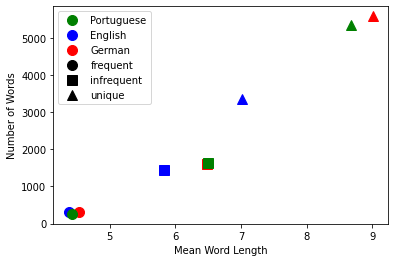

In [16]:
colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}
import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")

plt.show()